In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression #imporiting library for linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [3]:
# Reading the files
df_crops = pd.read_csv('FAOSTAT_data_4-23-2021Crops.csv')
df_livestock = pd.read_csv('FAOSTAT_data_4-23-2021Livestock.csv')


In [4]:
df_crops

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5312,Area harvested,1753,Fibre Crops Primary,1961,1961,ha,76892.0,A,"Aggregate, may include official, semi-official..."
1,QC,Crops,2,Afghanistan,5312,Area harvested,1753,Fibre Crops Primary,1962,1962,ha,91056.0,A,"Aggregate, may include official, semi-official..."
2,QC,Crops,2,Afghanistan,5312,Area harvested,1753,Fibre Crops Primary,1963,1963,ha,121408.0,A,"Aggregate, may include official, semi-official..."
3,QC,Crops,2,Afghanistan,5312,Area harvested,1753,Fibre Crops Primary,1964,1964,ha,121408.0,A,"Aggregate, may include official, semi-official..."
4,QC,Crops,2,Afghanistan,5312,Area harvested,1753,Fibre Crops Primary,1965,1965,ha,80939.0,A,"Aggregate, may include official, semi-official..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042,QC,Crops,5000,World,5419,Yield,1753,Fibre Crops Primary,2015,2015,hg/ha,1516.0,Fc,Calculated data
14043,QC,Crops,5000,World,5419,Yield,1753,Fibre Crops Primary,2016,2016,hg/ha,1587.0,Fc,Calculated data
14044,QC,Crops,5000,World,5419,Yield,1753,Fibre Crops Primary,2017,2017,hg/ha,1400.0,Fc,Calculated data
14045,QC,Crops,5000,World,5419,Yield,1753,Fibre Crops Primary,2018,2018,hg/ha,1544.0,Fc,Calculated data


## We chose our countries based on population and land area
### North America countries: Canada and USA
### South America: Brazil, Colombia, and Chile
### Asia: China, India, and Syria
### Africa: Nigeria, Ethiopia, and South Africa
### Europe: Romania, Italy Netherlands
### Oceania: Australia and New Zealand

# Crops Yield (hg/ha)

In [5]:
# Cleaning the data
# Dropped two Polynesia and Melanesia due to lack of data

df_crops['Area'].unique()
df_crops.drop(df_crops.index[df_crops['Area'] == 'Polynesia'], inplace = True)
df_crops.drop(df_crops.index[df_crops['Area'] == 'Melanesia'], inplace = True)
df_crops_cleaned = df_crops.dropna()
df_crops_cleaned = df_crops_cleaned[df_crops_cleaned['Element'] == 'Yield']

In [6]:
# North America Crops
NA_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Canada') | (df_crops_cleaned.Area == 'United States of America') ]
NA_Crops = NA_Crops[NA_Crops.Year < 2017]

# Finding the indices of zero entries
# idx = NA_Crops.index[NA_Crops.Value != 0]
# idx_Year = NA_Crops.Year[idx]

# Dropping zero entries
# NA_Crops = NA_Crops[NA_Crops.Value != 0]
NA_Crops = NA_Crops[(NA_Crops.Element == 'Yield')]
NA_Crops = NA_Crops.groupby('Year Code')['Value'].mean()

In [8]:
# South America
SA_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Colombia') | (df_crops_cleaned.Area == 'Brazil')| (df_crops_cleaned.Area == 'Chile') ]
SA_Crops = SA_Crops[SA_Crops.Year < 2017]
SA_Crops = SA_Crops[(SA_Crops.Element == 'Yield')]
SA_Crops = SA_Crops.groupby('Year Code')['Value'].mean()

In [9]:
# Asia
AS_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'India') | (df_crops_cleaned.Area == 'China')| (df_crops_cleaned.Area == 'Syria') ]
AS_Crops = AS_Crops[AS_Crops.Year < 2017]
AS_Crops = AS_Crops[(AS_Crops.Element == 'Yield')]
AS_Crops = AS_Crops.groupby('Year Code')['Value'].mean()

In [10]:
# AFRICA DATA 
AF_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Ethiopia') | (df_crops_cleaned.Area == 'Nigeria') | (df_crops_cleaned.Area == 'South Africa')]
AF_Crops = AF_Crops[AF_Crops.Year < 2017]
AF_Crops = AF_Crops[(AF_Crops.Element == 'Yield')]
AF_Crops = AF_Crops.groupby('Year Code')['Value'].mean()

In [11]:
# Europe data
EU_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Italy')  | (df_crops_cleaned.Area == 'Romania') | (df_crops_cleaned.Area == 'Netherlands')]
EU_Crops = EU_Crops[EU_Crops.Year < 2017]
EU_Crops = EU_Crops[(EU_Crops.Element == 'Yield')]
EU_Crops = EU_Crops.groupby('Year Code')['Value'].mean()

In [12]:
# Oceania data
OC_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Australia') | (df_crops_cleaned.Area == 'New Zealand') ]
OC_Crops = OC_Crops[OC_Crops.Year < 2017]
OC_Crops = OC_Crops[(OC_Crops.Element == 'Yield')]
OC_Crops = OC_Crops.groupby('Year Code')['Value'].mean()

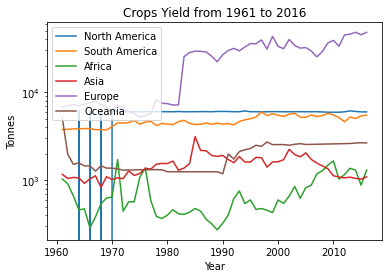

In [11]:
# Plotting crops yield for different continents
fig = plt.figure()
# ax = plt.axes()

NA = NA_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'North America')
SA = SA_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'South America')
AF = AF_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Africa')
AS = AS_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Asia')
EU = EU_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Europe')
OC = OC_Crops.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Oceania')

plt.title('Crops Yield from 1961 to 2016')
plt.legend()
plt.yscale('log')

plt.show()

# Livestock production (tonnes)

In [13]:
# Dropped two Polynesia and Melanesia due to lack of data
# Dropping NaN values from the dataframe

df_livestock.drop(df_livestock.index[df_livestock['Area'] == 'Polynesia'], inplace = True)
df_livestock.drop(df_livestock.index[df_livestock['Area'] == 'Melanesia'], inplace = True)

# Dropping NaN values from the dataframe
df_livestock_cleaned = df_livestock.dropna()

In [14]:
# NORTH AMERICA
df_northAmerica = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'United States of America') | (df_livestock_cleaned.Area == 'Canada') ]
df_northAmerica = df_northAmerica[df_northAmerica.Year < 2017]
df2_northAmerica = df_northAmerica[(df_northAmerica.Element == 'Production')]
dfg_NA = df2_northAmerica.groupby('Year Code')['Value'].mean()

In [15]:
# SOUTH AMERICA
df_southAmerica = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Brazil') | (df_livestock_cleaned.Area == 'Colombia') | (df_livestock_cleaned.Area == 'Chile') ]
df_southAmerica = df_southAmerica[df_southAmerica.Year < 2017]
df2_SA = df_southAmerica[(df_southAmerica.Element == 'Production')]
dfg_SA = df2_SA.groupby('Year Code')['Value'].mean()

In [16]:
#AFRICA
df_africa = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Nigeria') | (df_livestock_cleaned.Area == 'Ethiopia') | (df_livestock_cleaned.Area == 'South Africa') ]
df_africa = df_africa[df_africa.Year < 2017]
df2_AF = df_africa[(df_africa.Element == 'Production')]
dfg_AF = df2_AF.groupby('Year Code')['Value'].mean()

In [17]:
#ASIA
df_asia = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'China') | (df_livestock_cleaned.Area == 'India') | (df_livestock_cleaned.Area == 'Syria') ]
df_asia = df_asia[df_asia.Year < 2017]
df2_AS = df_asia[(df_asia.Element == 'Production')]
dfg_AS = df2_AS.groupby('Year Code')['Value'].mean()

In [18]:
#Europe
df_europe= df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Netherlands') | (df_livestock_cleaned.Area == 'Italy') | (df_livestock_cleaned.Area == 'Romania') ]
df_europe = df_europe[df_europe.Year < 2017]
df2_EU = df_europe[(df_europe.Element == 'Production')]
dfg_EU = df2_EU.groupby('Year Code')['Value'].mean()

In [19]:
#Oceania
df_oceania= df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Australia') | (df_livestock_cleaned.Area == 'New Zealand') | (df_livestock_cleaned.Area == 'Papua New Guinea')  ]
df_oceania = df_oceania[df_oceania.Year < 2017]
df2_OC = df_oceania[(df_oceania.Element == 'Production')]
dfg_OC = df2_OC.groupby('Year')['Value'].mean()

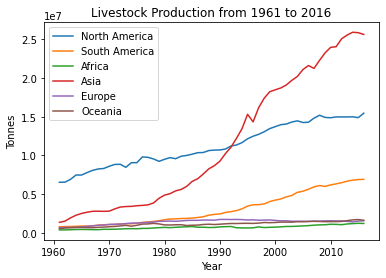

In [20]:
# Plotting livestock production for different continents
fig = plt.figure()

NA = dfg_NA.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'North America')
SA = dfg_SA.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'South America')
AF = dfg_AF.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Africa')
AS = dfg_AS.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Asia')
EU = dfg_EU.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Europe')
OC = dfg_OC.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line', label = 'Oceania')

plt.title('Livestock Production from 1961 to 2016')
plt.legend()
plt.show()

# Average annual land temperature (C) per continent

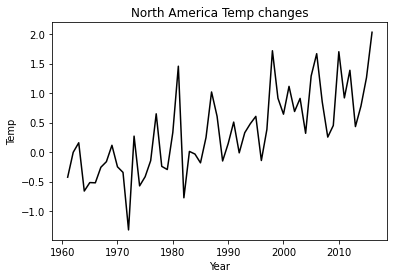

In [21]:
#Reading data for north america
df_NA1 = pd.read_csv('tas_1901_2016_CAN.csv')
df_NA2 = pd.read_csv('tas_1901_2016_USA.csv')

#This is the combonied tables for North America
df_NA =  pd.concat([df_NA1, df_NA2], axis=0)
df_NA.dropna()

#renaming column
df_NA.columns
df_NA = df_NA.rename(columns={' Year': 'Year'})

#Cleaning data
_df_NA = df_NA[(df_NA.Year > 1960)]
_df_NA


#Getting average per year
new_df_NA = _df_NA.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_NA 

#Plotting the data
new_df_NA.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('North America Temp changes')
plt.show()

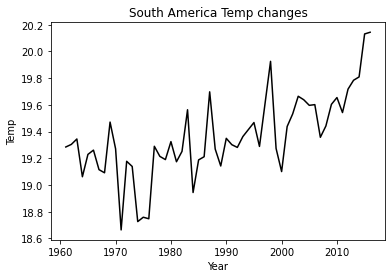

In [22]:
#South America 

#Reading data for north america
df_SA1 = pd.read_csv('tas_1901_2016_BRA.csv')
df_SA2 = pd.read_csv('tas_1901_2016_CHL.csv')
df_SA3 = pd.read_csv('tas_1901_2016_COL.csv')
#This is the combonied tables for North America
df_SA= pd.concat([df_SA1, df_SA2, df_SA3], axis=0)
df_SA.dropna()

#renaming column
df_SA.columns
df_SA = df_SA.rename(columns={' Year': 'Year'})

#Cleaning data
_df_SA = df_SA[(df_SA.Year > 1960)]
_df_SA

#Getting average per year
new_df_SA = _df_SA.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_SA 

#Plotting the data
new_df_SA.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('South America Temp changes')
plt.show()

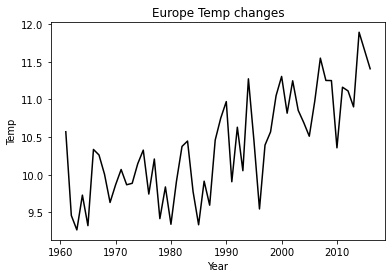

In [23]:
#Europe
df_EU1 = pd.read_csv('tas_1901_2016_NLD.csv')
df_EU2 = pd.read_csv('tas_1901_2016_ITA.csv')
df_EU3 = pd.read_csv('tas_1901_2016_ROU.csv')

#This is the combined tables for North America
df_EU= pd.concat([df_EU1, df_EU2, df_EU3], axis=0)
df_EU.dropna()

#renaming column
df_EU.columns
df_EU = df_EU.rename(columns={' Year': 'Year'})

#Cleaning data
_df_EU = df_EU[(df_EU.Year > 1960)]
_df_EU
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_EU = _df_EU.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_EU 

#Plotting the data
new_df_EU.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Europe Temp changes')
plt.show()


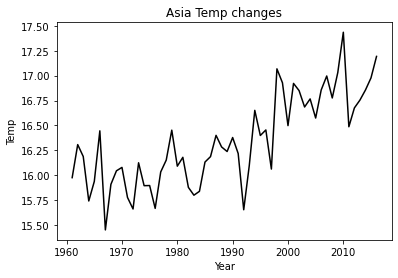

In [24]:
#Asia
df_AS1 = pd.read_csv('tas_1901_2016_CHN.csv')
df_AS2 = pd.read_csv('tas_1901_2016_IND.csv')
df_AS3 = pd.read_csv('tas_1901_2016_SYR.csv')

#This is the combonied tables for North America
df_AS= pd.concat([df_AS1, df_AS2, df_AS3], axis=0)
df_AS.dropna()

#renaming column
df_AS.columns
df_AS = df_AS.rename(columns={' Year': 'Year'})

#Cleaning data
_df_AS = df_AS[(df_AS.Year > 1960)]
_df_AS


#Getting average per year
new_df_AS = _df_AS.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_AS 

#Plotting the data
new_df_AS.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Asia Temp changes')
plt.show()

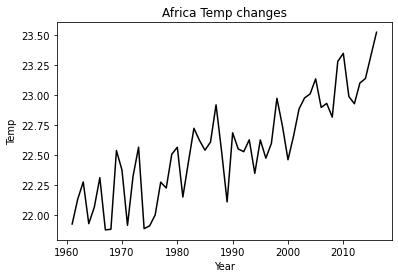

In [25]:
#Africa
#Reading data for Africa
df_AF1 = pd.read_csv('tas_1901_2016_ETH.csv')
df_AF2 = pd.read_csv('tas_1901_2016_NGA.csv')
df_AF3 = pd.read_csv('tas_1901_2016_ZAF.csv')

#This is the combonied tables for North America
df_AF= pd.concat([df_AF1, df_AF2, df_AF3], axis=0)
df_AF.dropna()

#renaming column
df_AF.columns
df_AF = df_AF.rename(columns={' Year': 'Year'})

#Cleaning data
_df_AF = df_AF[(df_AF.Year > 1960)]
_df_AF
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_AF = _df_AF.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_AF 

#Plotting the data
new_df_AF.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Africa Temp changes')
plt.show()

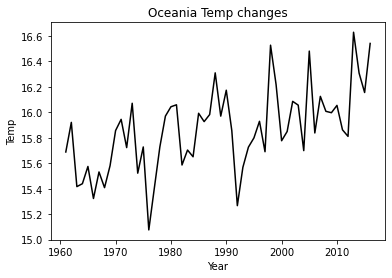

In [26]:
#Oceania
#Reading data for Oceania
df_OC1 = pd.read_csv('tas_1901_2016_AUS.csv')
df_OC2 = pd.read_csv('tas_1901_2016_NZL.csv')

#This is the combonied tables for North America
df_OC= pd.concat([df_OC1, df_OC2], axis=0)
df_OC.dropna()

#renaming column
df_OC.columns
df_OC = df_OC.rename(columns={' Year': 'Year'})

#Cleaning data
_df_OC = df_OC[(df_OC.Year > 1960)]
_df_OC
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_OC = _df_OC.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_OC 

#Plotting the data
new_df_OC.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Oceania Temp changes')
plt.show()

# Reading the projected temperature value for the next twenty years 

In [27]:
# Note that the projected temperature values are reported as monthly average for the next twenty yeras
df_projections = pd.read_csv('tas_2020_2039_mavg_rcp26_AUS_BRA_CAN_CHL_CHN_COL_ETH_IND_ITA_NLD_NZL_NGA_ROU_ZAF_SYR_USA.csv')
df_projections = df_projections.dropna() #cleaning the data
new_df_projections = df_projections.rename(columns={' Country': 'Country'})

# Converting dataframes to numpy arrays and scaling down the crops and livestock production data


In [28]:
scaler = StandardScaler()

In [29]:
#CONVERTING ALL DATA INTO numpy Arrays

#North America
new_df_NA = new_df_NA.to_numpy()
new_df_NA = new_df_NA[:,np.newaxis]
dfg_NA = dfg_NA.to_numpy()
dfg_NA = scaler.fit_transform(dfg_NA.reshape(-1,1))
NA_Crops = NA_Crops.to_numpy()
NA_Crops = scaler.fit_transform(NA_Crops.reshape(-1,1))

#South America
new_df_SA = new_df_SA.to_numpy()
new_df_SA = new_df_SA[:,np.newaxis]
dfg_SA = dfg_SA.to_numpy()
dfg_SA = scaler.fit_transform(dfg_SA.reshape(-1,1))
SA_Crops = SA_Crops.to_numpy()
SA_Crops = scaler.fit_transform(SA_Crops.reshape(-1,1))

#Europe
new_df_EU = new_df_EU.to_numpy()
new_df_EU = new_df_EU[:,np.newaxis]
dfg_EU = dfg_EU.to_numpy()
dfg_EU = scaler.fit_transform(dfg_EU.reshape(-1,1))
EU_Crops = EU_Crops.to_numpy()
EU_Crops = scaler.fit_transform(EU_Crops.reshape(-1,1))

#Africa
new_df_AF = new_df_AF.to_numpy()
new_df_AF = new_df_AF[:,np.newaxis]
dfg_AF = dfg_AF.to_numpy()
dfg_AF = scaler.fit_transform(dfg_AF.reshape(-1,1))
AF_Crops = AF_Crops.to_numpy()
AF_Crops = scaler.fit_transform(AF_Crops.reshape(-1,1))

#Asia
new_df_AS = new_df_AS.to_numpy()
new_df_AS = new_df_AS[:,np.newaxis]
dfg_AS = dfg_AS.to_numpy()
dfg_AS = scaler.fit_transform(dfg_AS.reshape(-1,1))
AS_Crops = AS_Crops.to_numpy()
AS_Crops = scaler.fit_transform(AS_Crops.reshape(-1,1))

#Oceania
new_df_OC = new_df_OC.to_numpy()
new_df_OC = new_df_OC[:,np.newaxis]
dfg_OC = dfg_OC.to_numpy()
dfg_OC = scaler.fit_transform(dfg_OC.reshape(-1,1))
OC_Crops = OC_Crops.to_numpy()
OC_Crops = scaler.fit_transform(OC_Crops.reshape(-1,1))

# North America Livestock production linear and polynomial regression

Best degree 3 with RMSE 0.8416451371359503


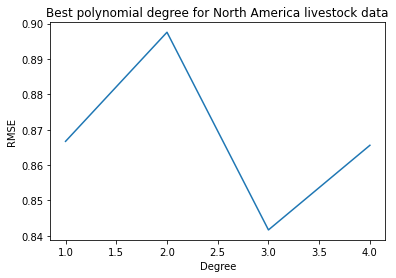

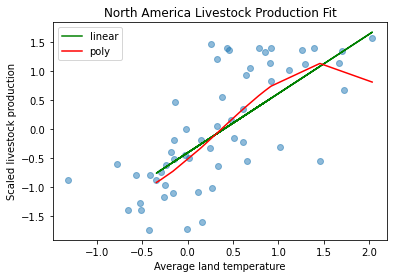

In [30]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degNA = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_NA, dfg_NA, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degNA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degNA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for North America livestock data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degNA), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA, dfg_NA, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('North America Livestock Production Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production')
ax.legend()

# North America predicted livestock production for the next twenty years 

In [31]:
#Extracting temeprature data for North America from projected temeprature dataset

NorthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' United States') | (new_df_projections['Country'] == ' Canada') ]
NorthAmerica_Projection = NorthAmerica_Projection.groupby(' Statistics').mean()
NorthAmerica_Projection = NorthAmerica_Projection.to_numpy()


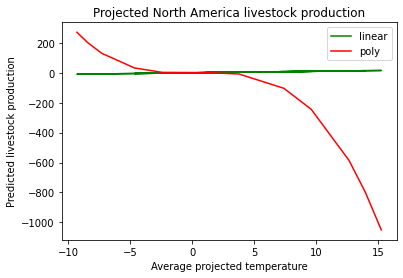

In [32]:
poly_model.fit(new_df_NA, dfg_NA)

linear_model.fit(new_df_NA, dfg_NA)

fig = plt.figure()
ax = plt.axes()

ax.plot(NorthAmerica_Projection, linear_model.predict(NorthAmerica_Projection), color='green', label='linear')
NorthAmerica_Projection.sort(axis=0)
ax.plot(NorthAmerica_Projection, poly_model.predict(NorthAmerica_Projection), color='red', label='poly')

plt.title('Projected North America livestock production')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted livestock production')
ax.legend()

# North America crops yield linear and polynomial regression

Best degree 3 with RMSE 0.8377836636506959


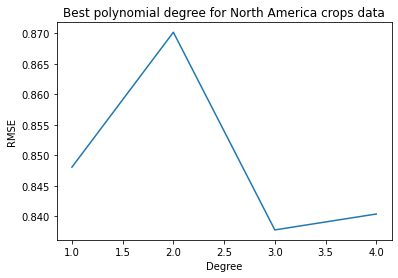

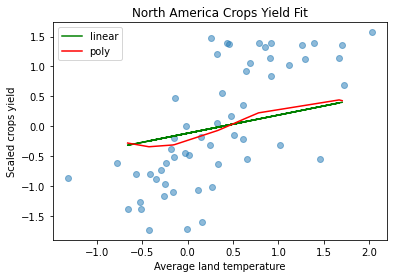

In [33]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degNA = 1e10, 0


X_train, X_test, y_train, y_test = train_test_split(new_df_NA, NA_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degNA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degNA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for North America crops data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degNA), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA, dfg_NA, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('North America Crops Yield Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crops yield')
ax.legend()

# North America predicted crops yield for the next twenty years 

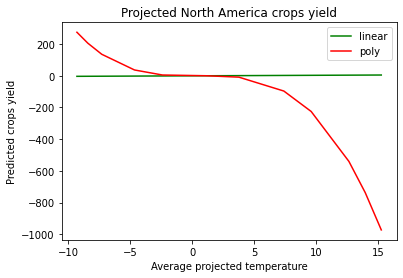

In [34]:
poly_model.fit(new_df_NA, NA_Crops)

linear_model.fit(new_df_NA, NA_Crops)

fig = plt.figure()
ax = plt.axes()

ax.plot(NorthAmerica_Projection, linear_model.predict(NorthAmerica_Projection), color='green', label='linear')
NorthAmerica_Projection.sort(axis=0)
ax.plot(NorthAmerica_Projection, poly_model.predict(NorthAmerica_Projection), color='red', label='poly')

plt.title('Projected North America crops yield')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted crops yield')
ax.legend()

# South America Livestock production linear and polynomial regression

Best degree 3 with RMSE 0.7545891132341236


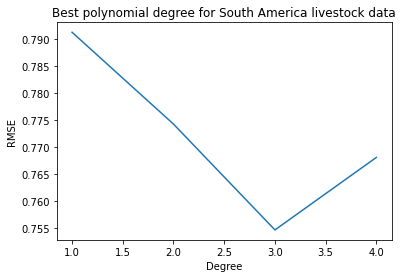

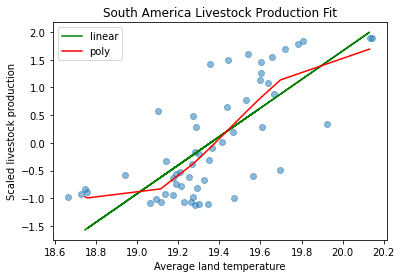

In [35]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degSA = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_SA, dfg_SA, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for South America livestock data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degSA), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_SA, dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('South America Livestock Production Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production')
ax.legend()

# South America predicted livestock production for the next twenty years 

In [36]:
#Extracting temeprature data for South America from projected temeprature dataset

SouthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' Brazil') | (new_df_projections['Country'] == ' Chile') | (new_df_projections['Country'] == ' Colombia') ]
SouthAmerica_Projection = SouthAmerica_Projection.groupby(' Statistics').mean()
SouthAmerica_Projection = SouthAmerica_Projection.to_numpy()

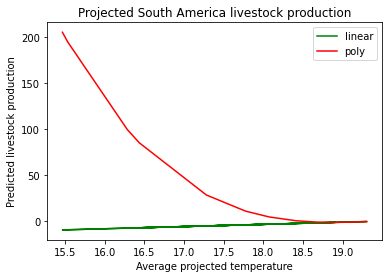

In [37]:
poly_model.fit(new_df_SA, dfg_SA)

linear_model.fit(new_df_SA, dfg_SA)

fig = plt.figure()
ax = plt.axes()

ax.plot(SouthAmerica_Projection, linear_model.predict(SouthAmerica_Projection), color='green', label='linear')
SouthAmerica_Projection.sort(axis=0)
ax.plot(SouthAmerica_Projection, poly_model.predict(SouthAmerica_Projection), color='red', label='poly')

plt.title('Projected South America livestock production')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted livestock production')
ax.legend()

# South America crops yield linear and polynomial regression

Best degree 3 with RMSE 0.6267101869091191


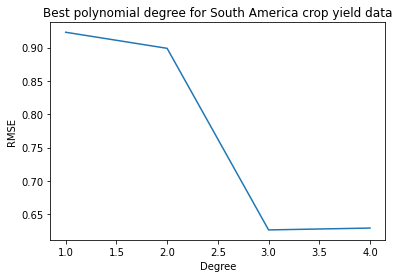

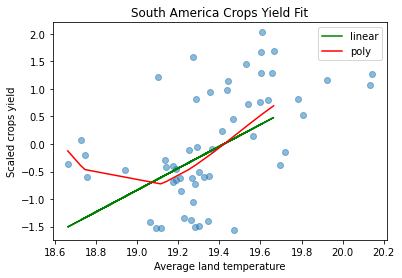

In [47]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degSA = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_SA, SA_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for South America crop yield data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degSA), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_SA, SA_Crops, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('South America Crops Yield Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crops yield')
ax.legend()

# South America predicted crops yield for the next twenty years 

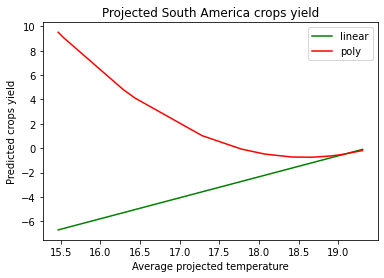

In [39]:
poly_model.fit(new_df_SA, SA_Crops)

linear_model.fit(new_df_SA, SA_Crops)

fig = plt.figure()
ax = plt.axes()

ax.plot(SouthAmerica_Projection, linear_model.predict(SouthAmerica_Projection), color='green', label='linear')
SouthAmerica_Projection.sort(axis=0)
ax.plot(SouthAmerica_Projection, poly_model.predict(SouthAmerica_Projection), color='red', label='poly')

plt.title('Projected South America crops yield')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted crops yield')
ax.legend()

# Europe live stock linear and polynomial regression

Best degree 0 with RMSE 0.8507582396232177


Text(0, 0.5, 'RMSE')

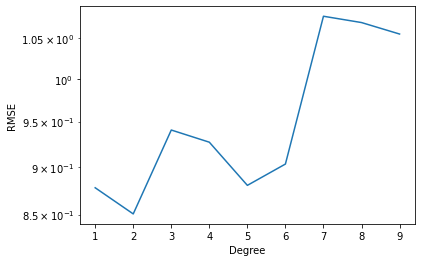

In [41]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degEU = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_EU, dfg_EU, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [56]:
Europe_Projection = new_df_projections[ (new_df_projections['Country'] == 'Netherlands') | (new_df_projections['Country'] == 'Italy') ]
Europe_Projection = Europe_Projection.groupby(' Statistics').mean()
Europe_Projection = Europe_Projection.to_numpy()

Best degree 0 with RMSE 0.9038735600585122


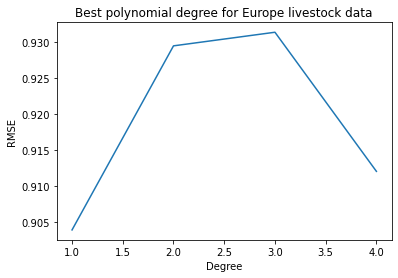

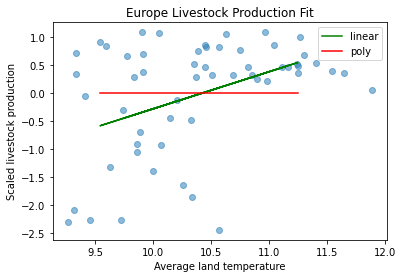

In [57]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degEU = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_EU, dfg_EU, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Europe livestock data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degEU), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_EU, dfg_EU, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Europe Livestock Production Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production')
ax.legend()

# Europe crop yield linear and polynomial regression

Best degree 3 with RMSE 0.8003774105073835


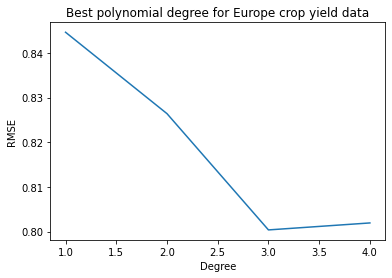

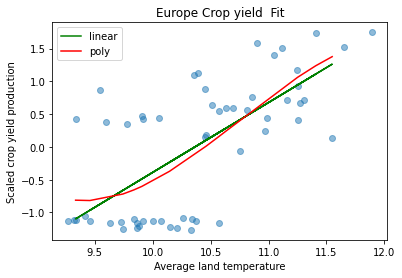

In [74]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degEU = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_EU, EU_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degEU = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Europe crop yield data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degEU), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_EU, EU_Crops, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Europe Crop yield  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crop yield production')
ax.legend()

# South America live stock linear and polynomial regression

Best degree 1 with RMSE 0.8129818002395011


Text(0, 0.5, 'RMSE')

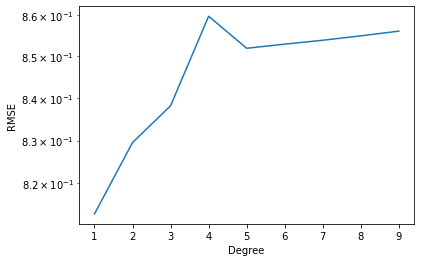

In [60]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degSA = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_SA, dfg_SA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 3 with RMSE 0.6230981865316386


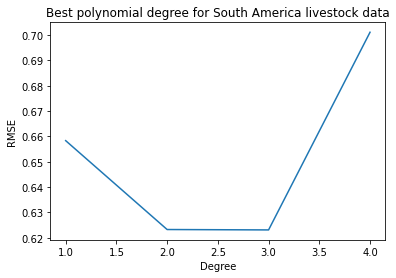

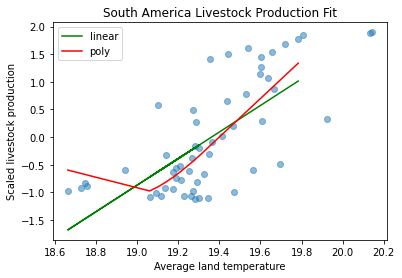

In [48]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degSA = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_SA, dfg_SA, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for South America livestock data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degSA), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_SA, dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('South America Livestock Production Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production')
ax.legend()

In [ ]:
#new_df_EU
#dfg_EU

#dfg_EU_1 = scaler.fit_transform(dfg_EU.reshape(-1,1))
#new_df_NA_1 = scaler.fit_transform(dfg_NA.reshape(-1,1))



x_train, x_test, y_train, y_test = train_test_split(new_df_SA_1, dfg_SA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degSA), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_SA_1,dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('South America Livestock Production')
plt.xlabel('')
plt.ylabel('')

ax.legend()

# AFRICA

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAF = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AF_1, dfg_AF, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

# AFRICA LIVE STOCK LINEAR AND POLYNOMIAL REGRESSION

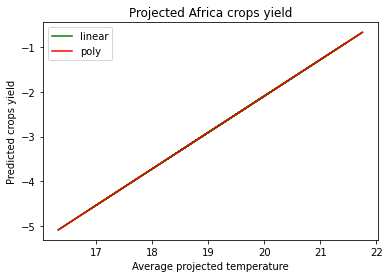

Best degree 3 with RMSE 0.6169861564069934


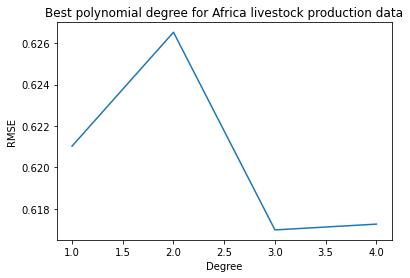

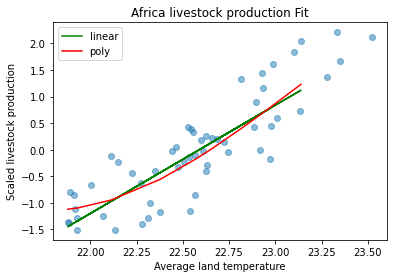

In [67]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degAF = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_AF, dfg_AF, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Africa livestock production data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degAF), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF, dfg_AF, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Africa livestock production Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production')
ax.legend()

# AFRICA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

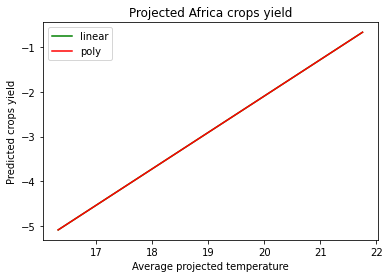

Best degree 2 with RMSE 0.6313185169829196


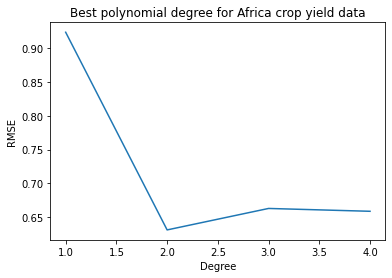

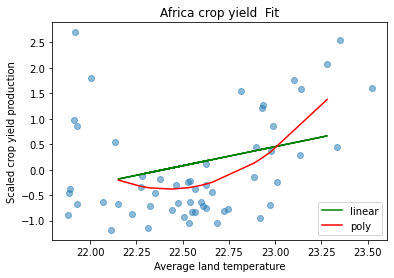

In [68]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degAF = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_AF, AF_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Africa crop yield data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degAF), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF, AF_Crops, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Africa crop yield  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crop yield production')
ax.legend()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF_1, dfg_AF, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF_1,dfg_AF, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Africa Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

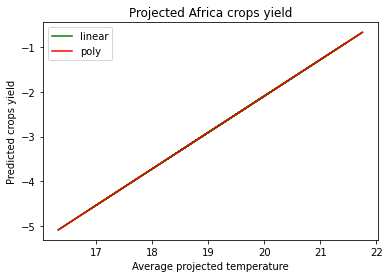

In [90]:
#Extracting temeprature data for South America from projected temeprature dataset

Africa_Projection = new_df_projections[ (new_df_projections['Country'] == ' Nigeria') | (new_df_projections['Country'] == ' Egypt') | (new_df_projections['Country'] == ' South Africa') ]
Africa_Projection = Africa_Projection.groupby(' Statistics').mean()
Africa_Projection = Africa_Projection.to_numpy()

poly_model.fit(new_df_AF, AF_Crops)

linear_model.fit(new_df_AF, AF_Crops)

fig = plt.figure()
ax = plt.axes()

ax.plot(Africa_Projection, linear_model.predict(Africa_Projection), color='green', label='linear')
Africa_Projection.sort(axis=0)
ax.plot(Africa_Projection, poly_model.predict(Africa_Projection), color='red', label='poly')

plt.title('Projected Africa crops yield')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted crops yield')
ax.legend()

# ASIA

Best degree 2 with RMSE 0.4163459850755385


Text(0, 0.5, 'RMSE')

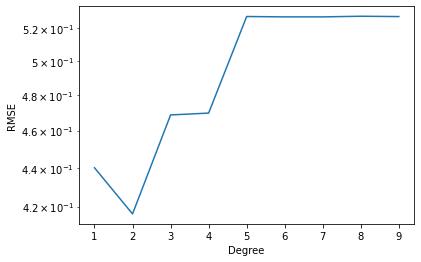

In [70]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAS = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AS, dfg_AS, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AS_1, dfg_AS, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAS), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS_1,dfg_AS, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Asia Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# ASIA LIVESTOCK AND CROP LINEAR AND POLYNOMIAL REGRESSION

Best degree 2 with RMSE 0.5776593023644252


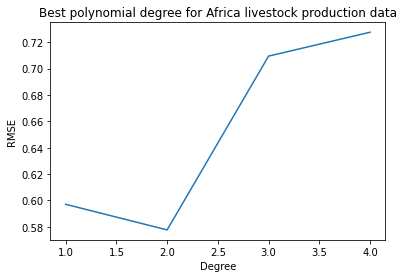

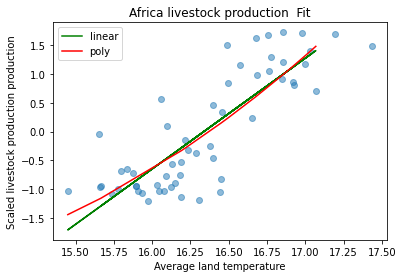

In [76]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degAS = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_AS, dfg_AS, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Asia livestock production data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degAS), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS, dfg_AS, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Asia livestock production  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production production')
ax.legend()

Best degree 4 with RMSE 0.596521253882684


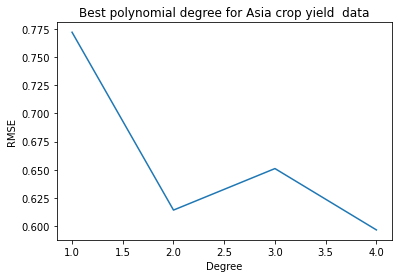

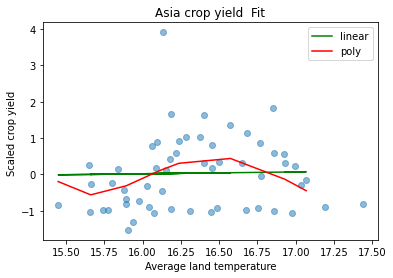

In [78]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degAS = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_AS, AS_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Asia crop yield  data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degAS), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS, AS_Crops, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Asia crop yield  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crop yield ')
ax.legend()

In [91]:
#Extracting temeprature data for South America from projected temeprature dataset

Asia_Projection = new_df_projections[ (new_df_projections['Country'] == ' China') | (new_df_projections['Country'] == ' Iran') | (new_df_projections['Country'] == ' India') ]
Asia_Projection = Africa_Projection.groupby(' Statistics').mean()
Asia_Projection = Africa_Projection.to_numpy()

poly_model.fit(new_df_AS, AS_Crops)

linear_model.fit(new_df_AS, AS_Crops)

fig = plt.figure()
ax = plt.axes()

ax.plot(Asia_Projection, linear_model.predict(Asia_Projection), color='green', label='linear')
Asia_Projection.sort(axis=0)
ax.plot(Asia_Projection, poly_model.predict(Asia_Projection), color='red', label='poly')

plt.title('Projected Asia crops yield')
plt.xlabel('Average projected temperature')
plt.ylabel('Predicted crops yield')
ax.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

# OCEANIA LINEAR AND POLYNOMIAL REGRESSION

Best degree 1 with RMSE 0.8767725792349065


Text(0, 0.5, 'RMSE')

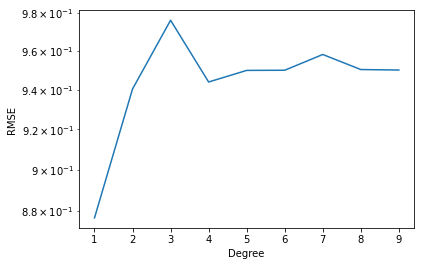

In [79]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degOC = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_OC, dfg_OC, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 3 with RMSE 1.128508255177341


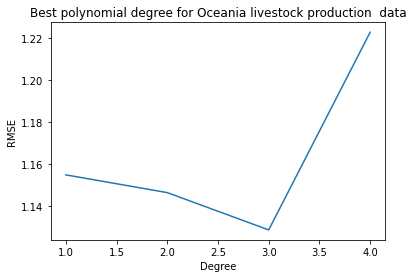

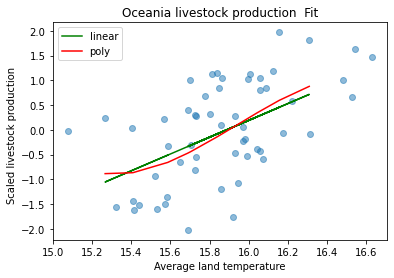

In [81]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degOC = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_OC, dfg_OC, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Oceania livestock production  data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degOC), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_OC, dfg_OC, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Oceania livestock production  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled livestock production  ')
ax.legend()

Best degree 1 with RMSE 0.7436146345522592


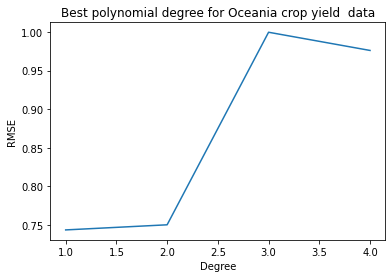

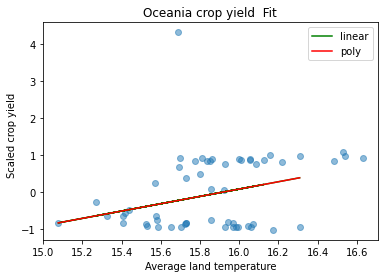

In [83]:
# Finding the best degree of polynomial
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_degOC = 1e10, 0

X_train, X_test, y_train, y_test = train_test_split(new_df_OC, OC_Crops, test_size = 0.2 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Best polynomial degree for Oceania crop yield  data')

# Linear and polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree = min_degOC), LinearRegression())
poly_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_OC, OC_Crops, alpha=0.5, cmap='viridis')
ax.plot(X_test, linear_model.predict(X_test), color='green', label='linear')
X_test.sort(axis=0)
ax.plot(X_test, poly_model.predict(X_test), color='red', label='poly')

plt.title('Oceania crop yield  Fit')
plt.xlabel('Average land temperature')
plt.ylabel('Scaled crop yield  ')
ax.legend()

# NA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degNA_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_NA_Crops_1, dfg_NA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degNA_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degNA_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_NA_Crops_1, dfg_NA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degNA_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA_Crops_1,dfg_NA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('North America Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# SA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degSA_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_SA_Crops_1, dfg_SA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_SA_Crops_1, dfg_SA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degSA_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA_Crops_1,dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('South America Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# Europe  CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degEU_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_EU_Crops_1, dfg_EU, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degEU_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_EU_Crops_1, dfg_EU, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degEU_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_EU_Crops_1,dfg_EU, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Europe Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# OCEANIA  CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degOC_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_OC_Crops_1, dfg_OC, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_OC_Crops_1, dfg_OC, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degOC_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_OC_Crops_1,dfg_OC, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Oceania Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# AFRICA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAF_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AF_Crops_1, dfg_AF, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF_Crops_1, dfg_AF, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF_Crops_1,dfg_AF, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# ASIA CR

In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAS_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AS_Crops_1, dfg_AS, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AS_Crops_1, dfg_AS, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAS_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS_Crops_1,dfg_AS, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Asia Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# As we can see, the mean squared error is very high due to the data we have recollected from the livestock production. To fix this, we will be scaling down the data to get more accurate results.

In [ ]:
######################## North America ###################################




In [ ]:
######################## ASIA ###################################

In [ ]:
######################## AFRICA ###################################

In [ ]:
######################## OCEANIA ###################################

# Calculating the projections livestock...

In [ ]:
df_projections = pd.read_csv('tas_2020_2039_mavg_rcp26_AUS_BRA_CAN_CHL_CHN_COL_ETH_IND_ITA_NLD_NZL_NGA_ROU_ZAF_SYR_USA.csv')
df_projections = df_projections.dropna() #cleaning the data


new_df_projections = df_projections.rename(columns={' Country': 'Country'})
# new_df_projections['Country'].unique()


In [ ]:
#Extracting data from North America (United states and Canada)

NorthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' United States') | (new_df_projections['Country'] == ' Canada') ]
NorthAmerica_Projection = NorthAmerica_Projection.groupby(' Statistics').mean()
# NorthAmerica_Projection = NorthAmerica_Projection['Monthly Temperature - (Celsius)']
NorthAmerica_Projection

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF, new_df_AF_Crops_1, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(x_train,y_train, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

In [ ]:
#Extracting Data from South America (Brazil, Colombia, Chile)
SouthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' Brazil') | (new_df_projections['Country'] == ' Chile') |(new_df_projections['Country'] == ' Colombia')  ]
SouthAmerica_Projection


In [ ]:
#Extracting data from Asia (China, India, Syria)
Asia_Projection = new_df_projections[ (new_df_projections['Country'] == ' China') | (new_df_projections['Country'] == ' India') |(new_df_projections['Country'] == ' Syria')  ]
Asia_Projection

In [ ]:
#Extracting data from Africa (Ethiopia, Nigeria , South Africa)
Africa_Projection = new_df_projections[ (new_df_projections['Country'] == ' Ethiopia') | (new_df_projections['Country'] == ' Nigeria') |(new_df_projections['Country'] == ' South Africa')  ]
Africa_Projection = Africa_Projection.groupby(' Statistics').mean()
Africa_Projection


Africa_Projection = Africa_Projection.to_numpy()


In [ ]:


poly_model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())
poly_model.fit(new_df_AF, new_df_AF_Crops_1)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(new_df_AF, new_df_AF_Crops_1)

fig = plt.figure()
ax = plt.axes()

#ax.scatter(Africa_Projection,new_df_AF_Crops_1, alpha=0.5, cmap='viridis')
ax.plot(Africa_Projection, linear_model_1.predict(Africa_Projection), color='green', label='linear')
Africa_Projection.sort(axis=0)
ax.plot(Africa_Projection, poly_model.predict(Africa_Projection), color='red', label='poly')
#Africa_Projection.sort(axis=0)
plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

In [ ]:
#Extracting data from Europe 
Europe_Projection = new_df_projections[ (new_df_projections['Country'] == ' Netherlands') | (new_df_projections['Country'] == ' Italy') |(new_df_projections['Country'] == ' Romania')  ]
Europe_Projection

In [ ]:
#Extracting data from Oceania (Australia, New Zealand)
Oceania_Projection = new_df_projections[ (new_df_projections['Country'] == ' Australia') | (new_df_projections['Country'] == ' New Zealand')]
Oceania_Projection

# Calculating the linear regression with this new data

In [ ]:
#North America
#North America

NorthAmerica_Projection = NorthAmerica_Projection.to_numpy()
# NorthAmerica_Projection = NorthAmerica_Projection[:,np.newaxis]
# dfg_NA = dfg_NA.to_numpy()


model.fit(new_df_NA,dfg_NA)
NA_pred = model.predict(NorthAmerica_Projection)

# print(new_df_NA_1[:3])
# print("----->" ,new_df_NA[:3])

# print(mean_squared_error(NA_y_test, NA_pred))
# print(mean_squared_error.confusion_matrix(NA_y_test, NA_pred))

plt.scatter(NorthAmerica_Projection, NA_pred,  color='red')
plt.plot(NorthAmerica_Projection, NA_pred, color='blue', linewidth=2)

plt.xticks()
plt.yticks()

plt.show()


In [ ]:
NA_pred


# Calculating the projections crops...

# Temperature data world wide

In [ ]:
# Changed the format of dt to datetime format "Year , month, day"
# Created a new column 'year'
# Dropped all NaN values
df_temp['dt'] = pd.to_datetime(df_temp['dt'], format = '%Y-%m-%d')

df_temp['year'] = df_temp['dt'].dt.year

df_temp.dropna()


# This graph shows the variation of temperature from 1961 to 2015
# The average land temperature has increased from 1961 to 2015

In [ ]:
df2 = df_temp[df_temp.year >= 1961]
df3 = df2.groupby('year')['LandAverageTemperature'].mean()
df3.plot(xlabel = 'Year', ylabel = 'Land Average Temp (Celcius)',x= 'year', y = 'LandAverageTemperature', kind = 'line',color = 'red')
plt.title('Average land temperature')
plt.show()

# This graph shows that the land minimum temperature has also been going up


In [ ]:
dfz = df_temp[df_temp.year >= 1961]
df4 = dfz.groupby('year')['LandMinTemperature'].mean()
df4.plot(xlabel = 'Year', ylabel = 'Land Min Temp (Celcius)',x= 'year', y = 'LandMinTemperature', kind = 'line',color = 'blue')
plt.title('Land Minimum Temperature')
plt.show()

In [ ]:
#sns.distplot(df3)

In [ ]:
df = df_crops[(df_crops.Element == 'Area harvested') & (df_crops.Area == 'World')]

dfg = df.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Crops Area harvested')
plt.show()

In [ ]:
df2 = df_crops[(df_crops.Element == 'Production') & (df_crops.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Crops Production')
plt.show()

In [ ]:
df_livestock

In [ ]:
df2 = df_livestock[(df_livestock.Element == 'Production') & (df_livestock.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line')
plt.title('Livestock Production')
plt.show()


In [ ]:
df2 = df_livestock[(df_livestock.Element == 'Yield') & (df_livestock.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = '100mg/An',x= 'Year Code', y = 'Value', kind = 'line')
plt.title('Livestock Yield')
plt.show()